NOTE

Platform used for coding: Jupyter Notebook

------------------ Jasmine Caur

INSTALL

LIBRARIES

IMPORT

LIBRARIES

In [4]:
%pip install imbalanced-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

READ

DATA

In [6]:
file_path = "/workspaces/codespaces-jupyter/data/dataset_train_1.csv"

trainData = pd.read_csv(file_path)

trainData.head()

,Unnamed: 0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Target
0,1,K1,128.0,415.0,01dc820b1aa6175cef997a09f88da685,no,yes,25.0,265.1,110.0,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.
1,2,NaN,NaN,415.0,6d146b9e63153486681d1f756d307806,no,yes,26.0,161.6,123.0,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.
2,3,N5,137.0,415.0,8b5d5b1825d00c99b28cd8464215739b,no,no,0.0,243.4,114.0,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.
3,4,O1,84.0,408.0,NaN,yes,no,NaN,299.4,71.0,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,NaN,False.
4,5,O2,75.0,415.0,ffd5bfdb4243cbe84b2e1fbabaac2d2a,yes,no,0.0,166.7,113.0,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.


In [7]:
file_path = "/workspaces/codespaces-jupyter/data/dataset_test_1.csv"

testData = pd.read_csv(file_path)

testData.head()

,Unnamed: 0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Target
0,1,C2,71.0,415.0,0731015efe10b09a50d71bb517c18920,no,no,0.0,211.2,70.0,...,122.0,21.48,225.8,104.0,10.16,12.3,3.0,3.32,0.0,False.
1,2,K2,76.0,415.0,c5b00e27b93854e0f6d68c886756a56a,no,no,0.0,204.0,NaN,...,110.0,19.13,240.3,85.0,10.81,9.6,5.0,2.59,1.0,False.
2,3,N5,87.0,510.0,41e0f4c5ca086d6e7eb5cfed9d74c4d0,no,no,0.0,223.2,109.0,...,86.0,10.84,289.3,83.0,13.02,14.5,4.0,3.92,3.0,False.
3,4,I3,117.0,408.0,aa42f9ac71fc022652ca2d219afd8f9b,no,no,0.0,119.0,82.0,...,108.0,15.94,189.3,NaN,8.52,11.5,3.0,3.11,1.0,False.
4,5,W1,177.0,415.0,436b8f981da8b065b83c8724f739de39,no,no,0.0,NaN,NaN,...,79.0,19.14,224.7,58.0,10.11,8.9,8.0,2.40,3.0,True.


DATA

ANALYSIS

In [8]:
# removing 1st column which has row number and 4th column which looks like id
trainData = trainData.drop(['Unnamed: 0', 'Var4'], axis = 1)
testData = testData.drop(['Unnamed: 0', 'Var4'], axis = 1)

# while converting to datagrame all the columns are taken as objects, so we need to assign them the correct datatype
trainData.to_string(columns = ["Var1", "Var5", "Var6", "Target"])
testData.to_string(columns = ["Var1", "Var5", "Var6", "Target"])

# replace NA with NaN because it's being considered as a string
trainData.replace("NA", np.NaN, inplace=True)
testData.replace("NA", np.NaN, inplace=True)

numericCols = ["Var2","Var3","Var7","Var8","Var9","Var10","Var11","Var12",
               "Var13","Var14","Var15","Var16","Var17","Var18","Var19","Var20"]
for col in numericCols:
    trainData[col] = pd.to_numeric(trainData[col],errors='coerce')
    testData[col] = pd.to_numeric(testData[col],errors='coerce')

trainData.head

<bound method NDFrame.head of      Var1   Var2   Var3 Var5 Var6  Var7   Var8   Var9  Var10  Var11  Var12  \
0      K1  128.0  415.0   no  yes  25.0  265.1  110.0  45.07  197.4   99.0   
1     NaN    NaN  415.0   no  yes  26.0  161.6  123.0  27.47  195.5  103.0   
2      N5  137.0  415.0   no   no   0.0  243.4  114.0  41.38  121.2  110.0   
3      O1   84.0  408.0  yes   no   NaN  299.4   71.0  50.90   61.9   88.0   
4      O2   75.0  415.0  yes   no   0.0  166.7  113.0  28.34  148.3  122.0   
...   ...    ...    ...  ...  ...   ...    ...    ...    ...    ...    ...   
2993   O3  161.0  408.0   no   no   0.0  196.6   73.0  33.42  170.2   79.0   
2994  NaN  128.0  408.0   no   no   0.0  227.9  130.0  38.74  302.6    NaN   
2995  NaN    NaN  415.0   no  yes  31.0    NaN   63.0  33.13  191.6   90.0   
2996   V1  113.0  408.0   no  yes  34.0   44.9   63.0   7.63  134.2   82.0   
2997   P1   87.0  408.0   no  yes  30.0  262.8  114.0  44.68  215.8  130.0   

      Var13  Var14  Var15  Var16 

In [9]:
# removing rows where Target is NA as it does not help with prediction
trainData = trainData.dropna(subset=['Target'])
trainData.head

<bound method NDFrame.head of      Var1   Var2   Var3 Var5 Var6  Var7   Var8   Var9  Var10  Var11  Var12  \
0      K1  128.0  415.0   no  yes  25.0  265.1  110.0  45.07  197.4   99.0   
1     NaN    NaN  415.0   no  yes  26.0  161.6  123.0  27.47  195.5  103.0   
2      N5  137.0  415.0   no   no   0.0  243.4  114.0  41.38  121.2  110.0   
3      O1   84.0  408.0  yes   no   NaN  299.4   71.0  50.90   61.9   88.0   
4      O2   75.0  415.0  yes   no   0.0  166.7  113.0  28.34  148.3  122.0   
...   ...    ...    ...  ...  ...   ...    ...    ...    ...    ...    ...   
2993   O3  161.0  408.0   no   no   0.0  196.6   73.0  33.42  170.2   79.0   
2994  NaN  128.0  408.0   no   no   0.0  227.9  130.0  38.74  302.6    NaN   
2995  NaN    NaN  415.0   no  yes  31.0    NaN   63.0  33.13  191.6   90.0   
2996   V1  113.0  408.0   no  yes  34.0   44.9   63.0   7.63  134.2   82.0   
2997   P1   87.0  408.0   no  yes  30.0  262.8  114.0  44.68  215.8  130.0   

      Var13  Var14  Var15  Var16 

DATA

PREPARATION

/tmp/ipykernel_4850/590021669.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = trainData.corr()


<Axes: >

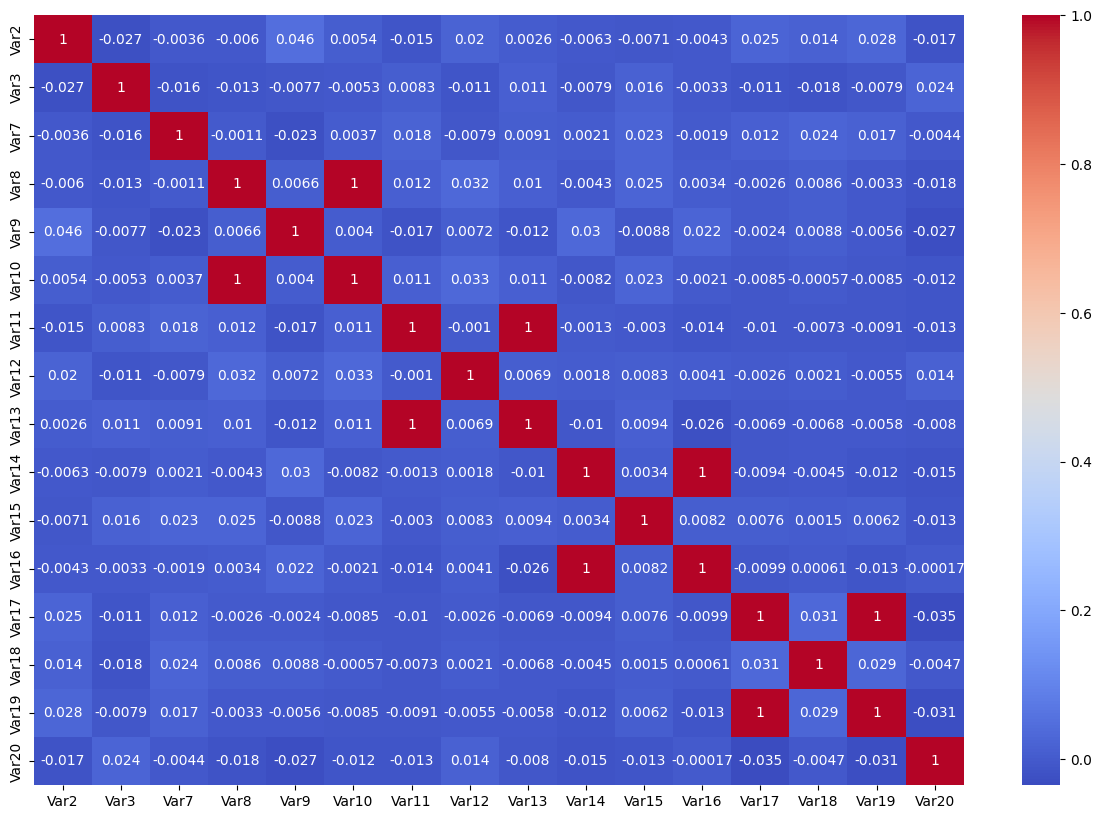

In [10]:
# check if variables are correlated to eachother, which might cause multicollinearity
corr_map = trainData.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_map, cmap = 'coolwarm', annot = True)

In [11]:
'''
columns that are correlated
1. 8 -> 10
2. 11 -> 13
3. 14 -> 16
4. 17 -> 19
'''

# check for null values
trainData.isnull().sum()

Var1      219
Var2      227
Var3        6
Var5       20
Var6      188
Var7      269
Var8      207
Var9      265
Var10      82
Var11     161
Var12     153
Var13     163
Var14     282
Var15       1
Var16     122
Var17      88
Var18     208
Var19      39
Var20     241
Target      0
dtype: int64

In [12]:
# removing columns that cause multicollinearity and have maximum null values
trainData = trainData.drop(['Var8','Var13','Var14','Var17'], axis = 1)
testData = testData.drop(['Var8','Var13','Var14','Var17'], axis= 1)
trainData.head

<bound method NDFrame.head of      Var1   Var2   Var3 Var5 Var6  Var7   Var9  Var10  Var11  Var12  Var15  \
0      K1  128.0  415.0   no  yes  25.0  110.0  45.07  197.4   99.0   91.0   
1     NaN    NaN  415.0   no  yes  26.0  123.0  27.47  195.5  103.0  103.0   
2      N5  137.0  415.0   no   no   0.0  114.0  41.38  121.2  110.0  104.0   
3      O1   84.0  408.0  yes   no   NaN   71.0  50.90   61.9   88.0   89.0   
4      O2   75.0  415.0  yes   no   0.0  113.0  28.34  148.3  122.0  121.0   
...   ...    ...    ...  ...  ...   ...    ...    ...    ...    ...    ...   
2993   O3  161.0  408.0   no   no   0.0   73.0  33.42  170.2   79.0   79.0   
2994  NaN  128.0  408.0   no   no   0.0  130.0  38.74  302.6    NaN   82.0   
2995  NaN    NaN  415.0   no  yes  31.0   63.0  33.13  191.6   90.0  129.0   
2996   V1  113.0  408.0   no  yes  34.0   63.0   7.63  134.2   82.0  118.0   
2997   P1   87.0  408.0   no  yes  30.0  114.0  44.68  215.8  130.0   88.0   

      Var16  Var18  Var19  Var20 

array([[<Axes: title={'center': 'Var2'}>,
        <Axes: title={'center': 'Var3'}>,
        <Axes: title={'center': 'Var7'}>],
       [<Axes: title={'center': 'Var9'}>,
        <Axes: title={'center': 'Var10'}>,
        <Axes: title={'center': 'Var11'}>],
       [<Axes: title={'center': 'Var12'}>,
        <Axes: title={'center': 'Var15'}>,
        <Axes: title={'center': 'Var16'}>],
       [<Axes: title={'center': 'Var18'}>,
        <Axes: title={'center': 'Var19'}>,
        <Axes: title={'center': 'Var20'}>]], dtype=object)

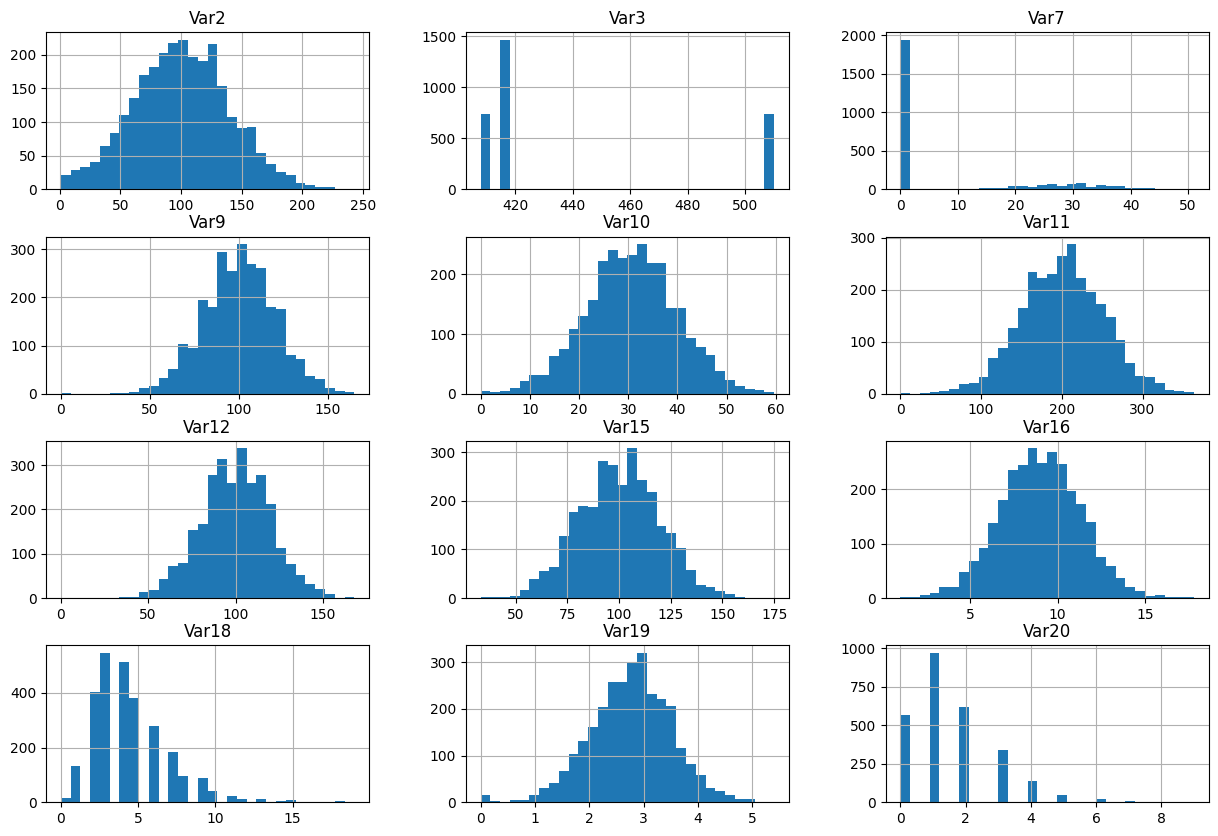

In [13]:
# create histogram to see if data has normal distribution
trainData.hist(bins=30, figsize=(15, 10))

In [14]:
# removing column 7 as it is extremely skewed
trainData = trainData.drop(["Var7"], axis = 1)
testData = testData.drop(["Var7"], axis = 1)

<Axes: >

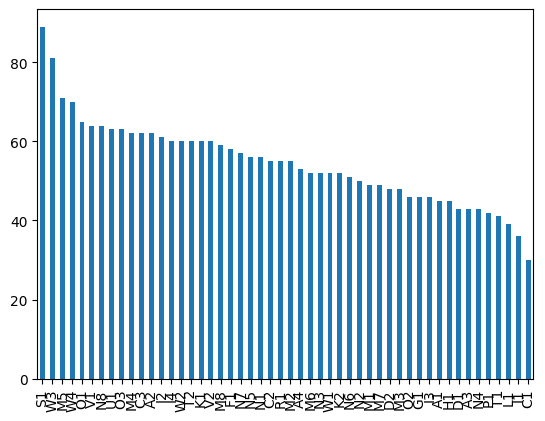

In [15]:
trainData["Var1"].value_counts().plot(kind = 'bar')

<Axes: >

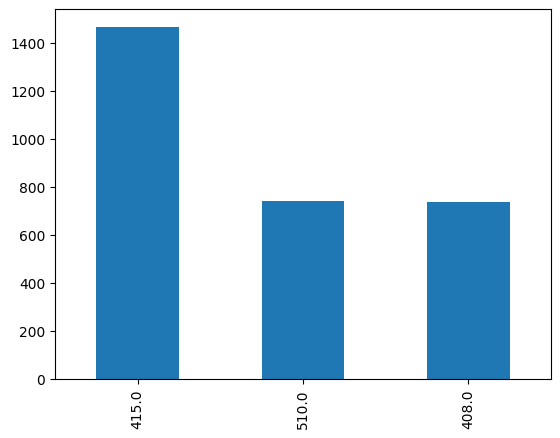

In [16]:
trainData["Var3"].value_counts().plot(kind = 'bar')

<Axes: >

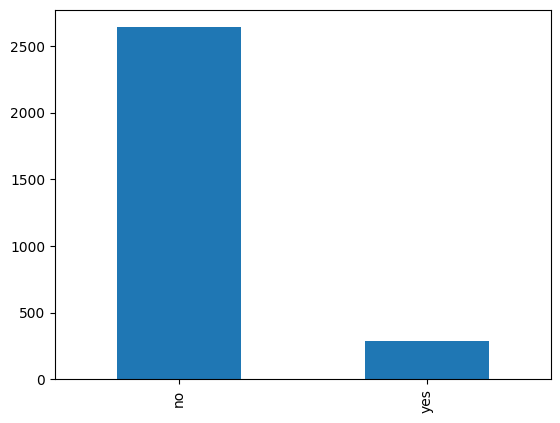

In [17]:
trainData["Var5"].value_counts().plot(kind = 'bar')

<Axes: >

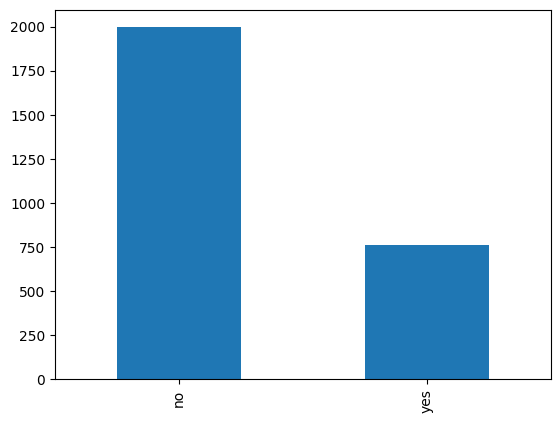

In [18]:
trainData["Var6"].value_counts().plot(kind = 'bar') 

<Axes: >

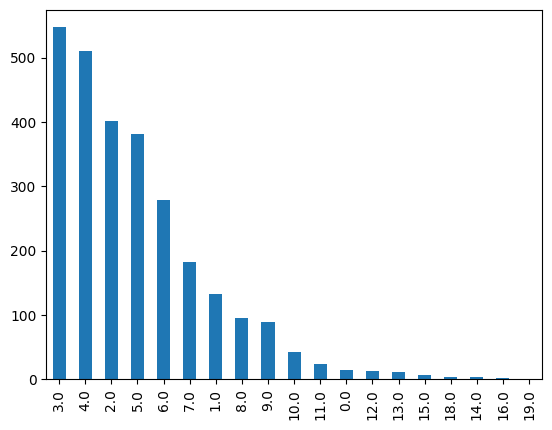

In [19]:
trainData["Var18"].value_counts().plot(kind = 'bar')

<Axes: >

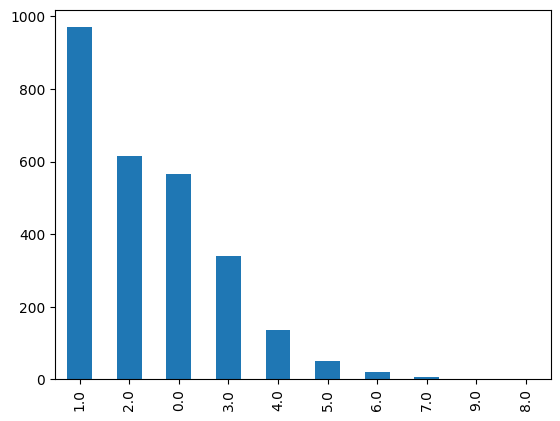

In [20]:
trainData["Var20"].value_counts().plot(kind = 'bar')

In [21]:
'''
Imputation is a method of filling missing values with numbers using a specific strategy. Some options to consider for imputation are:

1. A mean, median, or mode value from that column.
2. A distinct value, such as 0 or -1.
3. A randomly selected value from the existing set.
4. Values estimated using a predictive model.
'''
trainData.mode()

,Var1,Var2,Var3,Var5,Var6,Var9,Var10,Var11,Var12,Var15,Var16,Var18,Var19,Var20,Target
0,S1,86.0,415.0,no,no,102.0,29.67,169.9,94.0,105.0,9.66,3.0,3.05,1.0,False.
1,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
trainData.median()

/tmp/ipykernel_4850/1550183129.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainData.median()


Var2     100.000
Var3     415.000
Var9     100.000
Var10     30.535
Var11    201.400
Var12    100.000
Var15    100.000
Var16      9.035
Var18      4.000
Var19      2.780
Var20      1.000
dtype: float64

In [23]:
# categorical columns with NA: 1, 5, 6
# replace NA with mode in categorical columns as well as column 3, 18, 20(since they have only discrete values)

trainData["Var1"].fillna("S1",inplace=True)
trainData["Var5"].fillna("no",inplace=True)
trainData["Var6"].fillna("no",inplace=True)
trainData["Var3"].fillna(415.0,inplace=True)
trainData["Var18"].fillna(3.0,inplace=True)
trainData["Var20"].fillna(1.0,inplace=True)

In [24]:
testData["Var1"].fillna("S1",inplace=True)
testData["Var5"].fillna("no",inplace=True)
testData["Var6"].fillna("no",inplace=True)
testData["Var3"].fillna(145.0,inplace=True)
testData["Var18"].fillna(3.0,inplace=True)
testData["Var20"].fillna(1.0,inplace=True)

In [25]:
# numerical columns with NA: 2, 9, 10, 11, 12, 15, 16, 19
# replace NA with median

mediancCols = ["Var2","Var9","Var10","Var11","Var12",
               "Var15","Var16","Var19"]
for col in mediancCols:
    trainData[col].fillna(trainData[col].median(),inplace=True)
    testData[col].fillna(testData[col].median(),inplace=True)
    

In [26]:
# check for null values
trainData.isnull().sum()

Var1      0
Var2      0
Var3      0
Var5      0
Var6      0
Var9      0
Var10     0
Var11     0
Var12     0
Var15     0
Var16     0
Var18     0
Var19     0
Var20     0
Target    0
dtype: int64

In [27]:
# check for null values
testData.isnull().sum()

Var1      0
Var2      0
Var3      0
Var5      0
Var6      0
Var9      0
Var10     0
Var11     0
Var12     0
Var15     0
Var16     0
Var18     0
Var19     0
Var20     0
Target    0
dtype: int64

In [28]:
'''
There are two kinds of categorical data:

1. Ordinal Data: The categories have an inherent order
2. Nominal Data: The categories do not have an inherent order

Since the categorical columns only have null, yes and no, we'll use nominal encoding.
'''

# encoding categorial columns
label_encoder = preprocessing.LabelEncoder()

categoricalCols = ["Var5","Var6","Target"]
for col in categoricalCols:
    trainData[col] = label_encoder.fit_transform(trainData[col])
    testData[col] = label_encoder.fit_transform(testData[col])

In [29]:
'''
in column 1, if we use encoding the problem here is since there are different numbers in the same column,
the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. So to aviod that we'll use 
one hot encoding
'''
trainData = pd.get_dummies(trainData, columns= ["Var1"])
trainData.shape

(2948, 64)

In [30]:
testData = pd.get_dummies(testData, columns= ["Var1"])
testData.shape

(335, 64)

In [31]:
columns = list(trainData.columns)
print(columns)

['Var2', 'Var3', 'Var5', 'Var6', 'Var9', 'Var10', 'Var11', 'Var12', 'Var15', 'Var16', 'Var18', 'Var19', 'Var20', 'Target', 'Var1_A1', 'Var1_A2', 'Var1_A3', 'Var1_A4', 'Var1_C1', 'Var1_C2', 'Var1_C3', 'Var1_D1', 'Var1_D2', 'Var1_F1', 'Var1_G1', 'Var1_H1', 'Var1_I1', 'Var1_I2', 'Var1_I3', 'Var1_I4', 'Var1_K1', 'Var1_K2', 'Var1_L1', 'Var1_M1', 'Var1_M2', 'Var1_M3', 'Var1_M4', 'Var1_M5', 'Var1_M6', 'Var1_M7', 'Var1_M8', 'Var1_N1', 'Var1_N2', 'Var1_N3', 'Var1_N4', 'Var1_N5', 'Var1_N6', 'Var1_N7', 'Var1_N8', 'Var1_O1', 'Var1_O2', 'Var1_O3', 'Var1_P1', 'Var1_R1', 'Var1_S1', 'Var1_T1', 'Var1_T2', 'Var1_U1', 'Var1_V1', 'Var1_V2', 'Var1_W1', 'Var1_W2', 'Var1_W3', 'Var1_W4']


In [32]:
'''
As we know, most of the machine learning models learn from the data by the time the learning model maps 
the data points from input to output. And the distribution of the data points can be different for every feature 
of the data. Larger differences between the data points of input variables increase the uncertainty in the results
of the model. 
'''
# scale data to get them in the range (0,1)
scaler = preprocessing.MinMaxScaler()
trainDataScaled = scaler.fit_transform(trainData)
testDataScaled = scaler.fit_transform(testData)

In [33]:
print(type(trainDataScaled))

<class 'numpy.ndarray'>


In [34]:
print(trainDataScaled[0])

[0.52479339 0.06862745 0.         1.         0.66666667 0.75570087
 0.54275502 0.58928571 0.4084507  0.59593545 0.15789474 0.5
 0.11111111 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [35]:
trainDF = pd.DataFrame(trainDataScaled, columns = columns)
print(trainDF.iloc[0])

Var2       0.524793
Var3       0.068627
Var5       0.000000
Var6       1.000000
Var9       0.666667
             ...   
Var1_V2    0.000000
Var1_W1    0.000000
Var1_W2    0.000000
Var1_W3    0.000000
Var1_W4    0.000000
Name: 0, Length: 64, dtype: float64


In [36]:
testDF = pd.DataFrame(testDataScaled, columns = columns)

BUILD

MODEL

In [37]:
# separate the features and output

X = trainDF.iloc[:,trainData.columns!= 'Target']
y = trainDF["Target"]

X_test = testDF.iloc[:,testData.columns!= 'Target']
y_test = testDF["Target"] 

<Axes: >

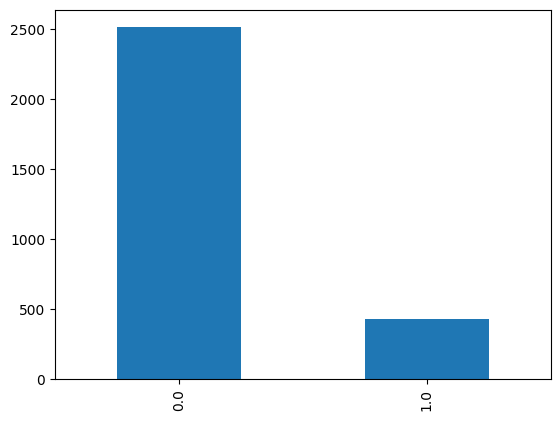

In [38]:
# check for data imbalance
y.value_counts().plot(kind = 'bar')

In [39]:
'''
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, 
and in turn have poor performance on, the minority class, although typically it is performance on the minority 
class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. 
The simplest approach involves duplicating examples in the minority class, although these examples don’t 
add any new information to the model. Instead, new examples can be synthesized from the existing examples. 
This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling 
Technique, or SMOTE for short.
'''
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X, y)

<Axes: >

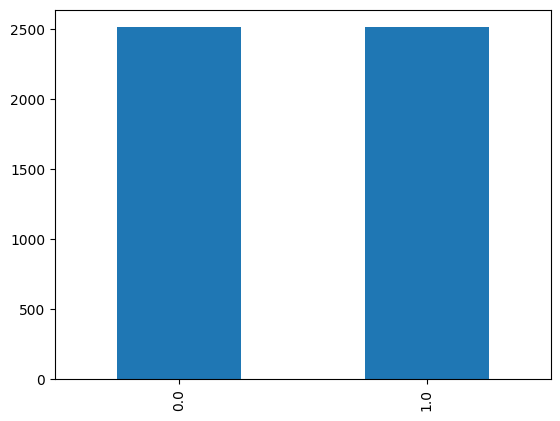

In [40]:
y_train_res.value_counts().plot(kind = 'bar')

In [41]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

TEST

MODEL

In [42]:
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_res, y_train_res)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [43]:
allModels = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
allModels['Accuracy'] = accuracy.values()
allModels['Precision'] = precision.values()
allModels['Recall'] = recall.values()

print(allModels)

                         Accuracy  Precision    Recall
Logistic Regression      0.743284   0.808511  0.330435
Support Vector Machines  0.737313   0.808511  0.324786
Decision Trees           0.623881   0.829787  0.248408
Random Forest            0.862687   0.829787  0.506494
Naive Bayes              0.477612   0.702128  0.170103
K-Nearest Neighbor       0.704478   0.319149  0.182927


CONCLUSION

We can see that without parameter tuning, random forest performs well. We can improve the preformace if we had more information about the dataset.